Họ và Tên : Lê Nguyễn Quang Vinh | MSSV: 22717161
- BÀI TẬP THỰC HÀNH LẬP TRÌNH PHÂN TÍCH DỮ LIỆU 1 TUẦN 02

- 1. Đọc dữ liệu lên dataframe

In [1]:
import pandas as pd

thietbi = pd.read_csv('thietbi.csv')
nguoidung_thietbi = pd.read_csv('nguoidung_thietbi.csv')
nguoidung_sudung = pd.read_csv('nguoidung_sudung.csv')

- 2. Vẽ mô hình quan hệ (ERD) từ bảng dữ liệu trên
- 3. Đổi tên các cột dữ liệu cần thiết

In [2]:
thietbi.rename(columns={'Retail Branding':'Branding','Marketing Name':'MarketingName'}, inplace=True)
thietbi.head(5)

,Branding,MarketingName,Device,Model
0,NaN,NaN,AD681H,Smartfren Andromax AD681H
1,NaN,NaN,FJL21,FJL21
2,NaN,NaN,T31,Panasonic T31
3,NaN,NaN,hws7721g,MediaPad 7 Youth 2
4,3Q,OC1020A,OC1020A,OC1020A


- 4. Trộn bảng nguoidung_sudung và nguoidung_thietbi thông qua inner join để được bảng
kết quả có các cột sau: [outgoing_mins_per_month, outgoing_sms_per_month,
monthly_mb, use_id, platform, device]

In [3]:
dfKetQua = pd.merge(nguoidung_sudung, nguoidung_thietbi[['use_id','platform','device']], on='use_id')
dfKetQua.head(5)

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,platform,device
0,21.97,4.82,1557.33,22787,android,GT-I9505
1,1710.08,136.88,7267.55,22788,android,SM-G930F
2,1710.08,136.88,7267.55,22789,android,SM-G930F
3,94.46,35.17,519.12,22790,android,D2303
4,71.59,79.26,1557.33,22792,android,SM-G361F


In [4]:
#hoac left - join

dfKetQua = pd.merge(nguoidung_sudung, nguoidung_thietbi[['use_id','platform','device']], on='use_id', how='left')
dfKetQua

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,platform,device
0,21.97,4.82,1557.33,22787,android,GT-I9505
1,1710.08,136.88,7267.55,22788,android,SM-G930F
2,1710.08,136.88,7267.55,22789,android,SM-G930F
3,94.46,35.17,519.12,22790,android,D2303
4,71.59,79.26,1557.33,22792,android,SM-G361F
...,...,...,...,...,...,...
235,260.66,68.44,896.96,25008,NaN,NaN
236,97.12,36.50,2815.00,25040,NaN,NaN
237,355.93,12.37,6828.09,25046,NaN,NaN
238,632.06,120.46,1453.16,25058,NaN,NaN


- 5. Tiếp tục inner-join bảng thietbi và dfKetQua để có thêm 2 cột Model và Branding trong
bảng kết quả cuối cùng. Lưu ý ở đây khóa liên kết sẽ khác tên


In [5]:
dfKetQua = pd.merge(dfKetQua,
                    thietbi[['Branding', 'Model']],
                    left_on='device',
                    right_on='Model')

dfKetQua.head()

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,platform,device,Branding,Model
0,21.97,4.82,1557.33,22787,android,GT-I9505,Samsung,GT-I9505
1,1710.08,136.88,7267.55,22788,android,SM-G930F,Samsung,SM-G930F
2,1710.08,136.88,7267.55,22789,android,SM-G930F,Samsung,SM-G930F
3,94.46,35.17,519.12,22790,android,D2303,Sony,D2303
4,71.59,79.26,1557.33,22792,android,SM-G361F,Samsung,SM-G361F


- 6. Hãy liệt kê 5 dòng đầu tiên các mẫu thiết bị (cột device) bắt đầu bằng GT

In [6]:
dfKetQua[dfKetQua.device.str.startswith('GT')].head(5)

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,platform,device,Branding,Model
0,21.97,4.82,1557.33,22787,android,GT-I9505,Samsung,GT-I9505
8,69.80,14.70,25955.55,22801,android,GT-I9505,Samsung,GT-I9505
10,189.10,24.08,519.12,22805,android,GT-I9195,Samsung,GT-I9195
29,85.97,26.94,407.01,22831,android,GT-I8190N,Samsung,GT-I8190N
52,29.54,34.78,33.79,22871,android,GT-I9300,Samsung,GT-I9300


- 7. Hãy thống kê trung bình số phút hàng tháng, trung bình sms và trung bình data, số lượng
sử dụng của các nhãn hàng

In [7]:
dfKetQua.groupby('Branding').agg({'outgoing_mins_per_month':'mean', 'outgoing_sms_per_month':'mean', 'monthly_mb':'mean', 'use_id':'count'})

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id
Branding,,,,
HTC,299.842955,93.059318,5144.077955,44
Huawei,81.526667,9.500000,1561.226667,3
LGE,111.530000,12.760000,1557.330000,2
Lava,60.650000,261.900000,12458.670000,2
Lenovo,215.920000,12.930000,1557.330000,2
Motorola,95.127500,65.666250,3946.500000,16
OnePlus,354.855000,48.330000,6575.410000,6
Samsung,191.010093,92.390463,4017.318889,108
Sony,177.315625,40.176250,3212.000625,16


- 8. Trực quan số lượng người dùng các nhãn hàng

<ipython-input-13-5316629a0fed>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Branding', data=dfKetQua, palette= 'viridis' )


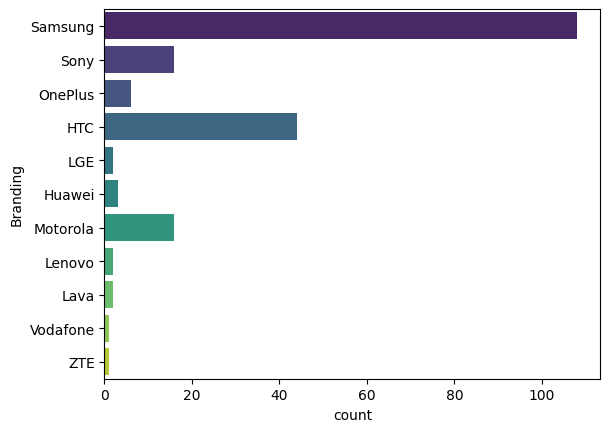

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(y='Branding', data=dfKetQua, palette= 'viridis' )
plt.show()

- 9. Trực quan hóa dữ liệu trung bình phút gọi, trung bình sms và dung lượng sử dụng trên
từng nhóm nhãn hàng bán lẻ

<ipython-input-12-0b975a4175a5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Branding', x='outgoing_mins_per_month', data=dfKetQua , palette= 'viridis' , errorbar= None)


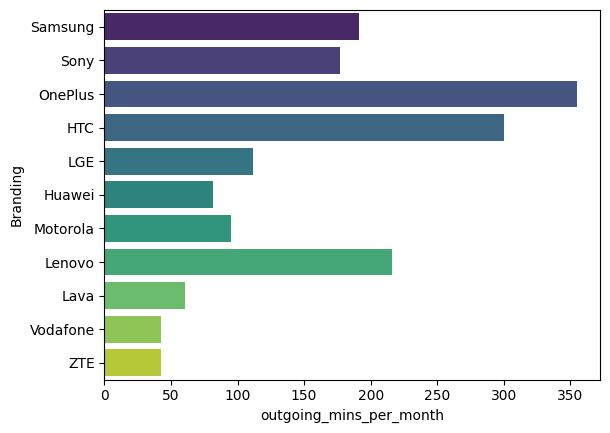

In [12]:
import numpy as np

sns.barplot(y='Branding', x='outgoing_mins_per_month', data=dfKetQua , palette= 'viridis' , errorbar= None)
plt.show()


- 10. Khảo sát tương quan giữa phút gọi, sms và dung lượng trên từng nhóm nhãn hàng

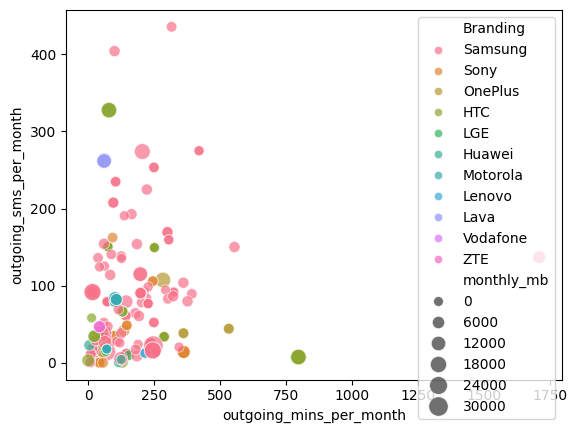

In [15]:
sns.scatterplot(
    data=dfKetQua,
    x="outgoing_mins_per_month",
    y="outgoing_sms_per_month",
    hue="Branding",
    size="monthly_mb",
    sizes=(50, 200),
    alpha=0.7
)
plt.show()

- 11. Hãy kiểm định xem trung bình outgoing_mins_per_month có bằng 200 phút

In [16]:
from scipy import stats

t_statistic, p_value = stats.ttest_1samp(dfKetQua['outgoing_mins_per_month'], 200)

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

alpha = 0.05  # Significance level

if p_value < alpha:
    print("Bác bỏ giả thuyết suy diễn. Giá trị trung bình outgoing_mins_per_month không bằng 200.")
else:
    print("Không thể bác bỏ giả thuyết suy diễn. Giá trị trung bình outgoing_mins_per_month bằng 200.")


T-statistic: 0.3678324474067915
P-value: 0.7133871524810331
Không thể bác bỏ giả thuyết suy diễn. Giá trị trung bình outgoing_mins_per_month bằng 200.


- 12. Hãy kiểm định xem trung bình outgoing_sms_per_month có bằng 100 tin nhắn

In [17]:
t_statistic, p_value = stats.ttest_1samp(dfKetQua['outgoing_sms_per_month'], 100)

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

alpha = 0.05  # Significance level

if p_value < alpha:
    print("Bác bỏ giả thuyết suy diễn. Giá trị trung bình outgoing_sms_per_month không bằng 100.")
else:
    print("Không thể bác bỏ giả thuyết suy diễn. Giá trị trung bình outgoing_sms_per_month bằng 100.")

T-statistic: -2.9567085781961198
P-value: 0.003483493850205251
Bác bỏ giả thuyết suy diễn. Giá trị trung bình outgoing_sms_per_month không bằng 100.


- 13. Hãy kiểm định xem trung bình monthly_mb có bằng 2048 mb


In [18]:
t_statistic, p_value = stats.ttest_1samp(dfKetQua['monthly_mb'], 2048)

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

alpha = 0.05  # Significance level

if p_value < alpha:
    print("Bác bỏ giả thuyết suy diễn. Giá trị trung bình monthly_mb không bằng 2048.")
else:
    print("Không thể bác bỏ giả thuyết suy diễn. Giá trị trung bình monthly_mb bằng 2048.")

T-statistic: 5.918078326415772
P-value: 1.3950238813156428e-08
Bác bỏ giả thuyết suy diễn. Giá trị trung bình monthly_mb không bằng 2048.


- 14. Hãy tạo ma trận tương quan giữa [outgoing_mins_per_month, outgoing_sms_per_month,
monthly_mb] và sắp xếp tăng dần về mức độ tương quan


In [20]:
correlation_matrix = dfKetQua[['outgoing_mins_per_month', 'outgoing_sms_per_month', 'monthly_mb']].corr()

# Flatten the correlation matrix and remove self-correlations
corr_pairs = correlation_matrix.unstack().sort_values()
corr_pairs = corr_pairs[corr_pairs != 1]

corr_pairs

,,0
outgoing_sms_per_month,monthly_mb,-0.046049
monthly_mb,outgoing_sms_per_month,-0.046049
outgoing_mins_per_month,outgoing_sms_per_month,-0.016494
outgoing_sms_per_month,outgoing_mins_per_month,-0.016494
outgoing_mins_per_month,monthly_mb,0.213489
monthly_mb,outgoing_mins_per_month,0.213489


- 15. Kiểm định xem outgoing_mins_per_month, outgoing_sms_per_month có tương quan

In [21]:
from scipy.stats import pearsonr

# Calculate Pearson correlation coefficient and p-value
correlation_coefficient, p_value = pearsonr(dfKetQua['outgoing_mins_per_month'], dfKetQua['outgoing_sms_per_month'])

print(f"Pearson Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

alpha = 0.05  # Significance level

if p_value < alpha:
    print("Có bằng chứng thống kê để bác bỏ giả thuyết không có tương quan giữa outgoing_mins_per_month và outgoing_sms_per_month.")
else:
    print("Không có bằng chứng thống kê đủ mạnh để bác bỏ giả thuyết không có tương quan giữa outgoing_mins_per_month và outgoing_sms_per_month.")

Pearson Correlation Coefficient: -0.016494441685319397
P-value: 0.8162223636414793
Không có bằng chứng thống kê đủ mạnh để bác bỏ giả thuyết không có tương quan giữa outgoing_mins_per_month và outgoing_sms_per_month.


- 16. Hãy kiểm định xem có mối quan hệ nào giữa platform và branding

In [22]:
# Assuming 'platform' and 'Branding' are categorical variables.  We'll use a Chi-squared test.

from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(dfKetQua['platform'], dfKetQua['Branding'])

# Perform the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-squared statistic: {chi2}")
print(f"P-value: {p}")

alpha = 0.05

if p < alpha:
    print("Có mối quan hệ thống kê đáng kể giữa platform và Branding.")
else:
    print("Không có mối quan hệ thống kê đáng kể giữa platform và Branding.")

Chi-squared statistic: 0.0
P-value: 1.0
Không có mối quan hệ thống kê đáng kể giữa platform và Branding.


- 17. Hãy kiểm định xem có mối quan hệ nào giữa monthly_mb và platform

Các nền tảng duy nhất: ['android']

Không thể thực hiện kiểm định ANOVA vì chỉ có một nền tảng duy nhất.


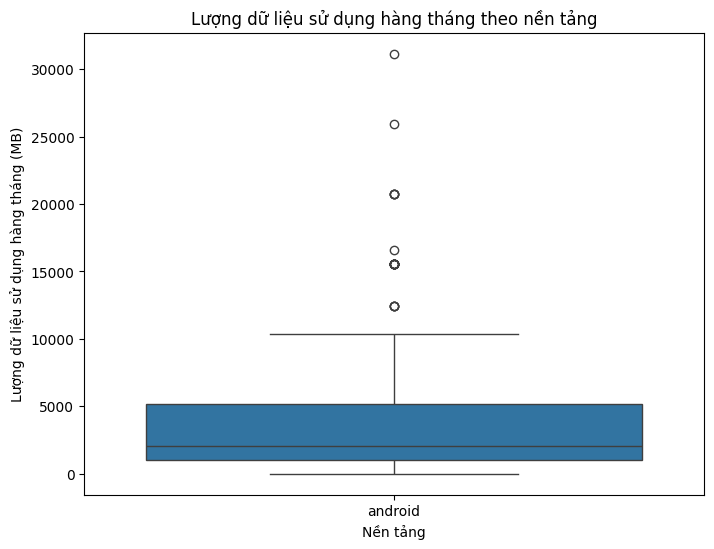

In [29]:
import pandas as pd
import statsmodels.formula.api as sm
from statsmodels.stats.anova import anova_lm
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Kiểm tra các giá trị duy nhất trong cột 'platform'
unique_platforms = dfKetQua['platform'].unique()
print(f"Các nền tảng duy nhất: {unique_platforms}")
num_unique_platforms = len(unique_platforms)

# 2. Tiến hành kiểm định ANOVA nếu có nhiều nền tảng duy nhất
if num_unique_platforms > 1:
    # Tạo biến giả (dummy variables) cho cột 'platform'
    platform_dummies = pd.get_dummies(dfKetQua['platform'], prefix='platform', drop_first=True)

    # Nối biến giả với DataFrame gốc
    dfKetQua = pd.concat([dfKetQua, platform_dummies], axis=1)

    # Xác định công thức cho mô hình
    formula = 'monthly_mb ~ ' + ' + '.join(platform_dummies.columns)

    # Khớp mô hình OLS (Ordinary Least Squares)
    model = sm.ols(formula, data=dfKetQua).fit()

    # Thực hiện kiểm định ANOVA
    anova_table = anova_lm(model, typ=2)

    print("\nKết quả kiểm định ANOVA:")
    print(anova_table)

    # Diễn giải kết quả (giá trị p)
    alpha = 0.05
    p_value = anova_table['PR(>F)'][0]  # Lấy giá trị p từ bảng ANOVA
    if p_value < alpha:
        print(f"\nCó mối quan hệ thống kê đáng kể giữa monthly_mb và platform (giá trị p = {p_value:.3f})")
    else:
        print(f"\nKhông có mối quan hệ thống kê đáng kể giữa monthly_mb và platform (giá trị p = {p_value:.3f})")
else:
    print("\nKhông thể thực hiện kiểm định ANOVA vì chỉ có một nền tảng duy nhất.")


# 3. Trực quan hóa dữ liệu bằng biểu đồ hộp (boxplot)
plt.figure(figsize=(8, 6))
sns.boxplot(x='platform', y='monthly_mb', data=dfKetQua)
plt.title('Lượng dữ liệu sử dụng hàng tháng theo nền tảng')
plt.xlabel('Nền tảng')
plt.ylabel('Lượng dữ liệu sử dụng hàng tháng (MB)')
plt.show()

- 18. Hãy kiểm định xem có mối quan hệ nào giữa monthly_mb và platform theo loại brandin

In [30]:
# Create a contingency table
contingency_table = pd.crosstab([dfKetQua['platform'], dfKetQua['Branding']], dfKetQua['monthly_mb'])

# Perform the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-squared statistic: {chi2}")
print(f"P-value: {p}")

alpha = 0.05

if p < alpha:
    print("Có mối quan hệ thống kê đáng kể giữa monthly_mb và platform theo loại branding.")
else:
    print("Không có mối quan hệ thống kê đáng kể giữa monthly_mb và platform theo loại branding.")

Chi-squared statistic: 544.6732898467274
P-value: 2.068348390104034e-16
Có mối quan hệ thống kê đáng kể giữa monthly_mb và platform theo loại branding.


- 19. Phân tích sự ảnh hưởng của outgoing_mins_per_month, outgoing_sms_per_month đến
monthly_mb dựa trên mô hình hồi quy tuyến tính


In [31]:
# Xây dựng mô hình hồi quy tuyến tính
model = sm.ols('monthly_mb ~ outgoing_mins_per_month + outgoing_sms_per_month', data=dfKetQua).fit()

# In kết quả của mô hình
print(model.summary())

# Phân tích kết quả:
# - R-squared: Đo lường mức độ phù hợp của mô hình. Giá trị càng gần 1, mô hình càng tốt.
# - coef: Hệ số hồi quy của các biến độc lập.  Cho biết sự thay đổi của biến phụ thuộc khi biến độc lập thay đổi 1 đơn vị, giữ nguyên các biến khác.
# - std err: Sai số chuẩn của hệ số hồi quy.
# - t: Thống kê t của hệ số hồi quy.
# - P>|t|: Giá trị p của hệ số hồi quy.  Nếu p < 0.05, biến độc lập có ảnh hưởng đáng kể đến biến phụ thuộc.
# - Omnibus, Jarque-Bera, Prob(JB), Cond. No.: Các chỉ số chẩn đoán mô hình.

                            OLS Regression Results                            
Dep. Variable:             monthly_mb   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     4.925
Date:                Sat, 11 Jan 2025   Prob (F-statistic):            0.00818
Time:                        12:46:04   Log-Likelihood:                -2005.3
No. Observations:                 201   AIC:                             4017.
Df Residuals:                     198   BIC:                             4027.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                3


==> KẾT LUẬN:
- Phân tích từng biến độc lập:
- a. outgoing_mins_per_month:
Hệ số (coef): 4.8782.
P-value: 0.002 (< 0.05).
> Biến này có ý nghĩa thống kê, tức là nó có ảnh hưởng đáng kể đến lượng dữ liệu sử dụng hàng tháng.
Khoảng tin cậy 95%: [1.742, 8.014].

- b. outgoing_sms_per_month:
Hệ số (coef): -2.8500.
P-value: 0.540 (> 0.05).
> Biến này không có ý nghĩa thống kê, tức là không có ảnh hưởng đáng kể đến lượng dữ liệu sử dụng hàng tháng.
Khoảng tin cậy 95%: [-12.016, 6.316].
Khoảng tin cậy chứa cả giá trị âm và dương, củng cố rằng biến này không có ý nghĩa.
3. Chất lượng mô hình:
- R-squared: 0.047.
>Chỉ 4.7% sự thay đổi trong monthly_mb được giải thích bởi mô hình này.
- Adj. R-squared: 0.038.
>Giá trị điều chỉnh thấp, mô hình có thể không phù hợp để dự đoán chính xác.
- F-statistic và P-value của F:
>Giá trị F = 4.925 và P-value = 0.008 (< 0.05).
Mô hình tổng thể có ý nghĩa thống kê.
4. Kết luận:
- outgoing_mins_per_month có ảnh hưởng dương đáng kể đến lượng dữ liệu sử dụng hàng tháng.
- outgoing_sms_per_month không có ảnh hưởng đáng kể đến lượng dữ liệu sử dụng.
- Mặc dù mô hình có ý nghĩa tổng thể, nhưng R-squared thấp cho thấy mô hình không giải thích được phần lớn sự biến đổi trong dữ liệu. Có thể cần thêm các biến độc lập khác để cải thiện mô hình.


---



- 20. Dựa trên mô hình hồi quy tuyến tính hãy cho biết nếu outgoing_mins_per_month,
outgoing_sms_per_month lần lượt là 50 phút, 75 tin nhắn thì tháng đó người dùng sẽ tiêu
hao bao nhiêu dung lượng internet (mb) cho quá trình sử dụng.

In [33]:
# Dự đoán monthly_mb với outgoing_mins_per_month = 50 và outgoing_sms_per_month = 75
outgoing_mins = 50
outgoing_sms = 75

# Sử dụng hệ số hồi quy từ mô hình đã có
intercept = model.params['Intercept']
coef_mins = model.params['outgoing_mins_per_month']
coef_sms = model.params['outgoing_sms_per_month']

predicted_mb = intercept + coef_mins * outgoing_mins + coef_sms * outgoing_sms

print(f"Dự đoán lượng dung lượng internet (MB) sử dụng: {predicted_mb}")

Dự đoán lượng dung lượng internet (MB) sử dụng: 3543.1991282774275
